In [1]:
import os
import shutil
import glob

In [2]:
# train_dir='/dataset'
# clas=['cat','dog']
# org_dir=r"C:\Users\manoj\Desktop\datasets\dogs-vs-cats\train\train"

In [3]:
# for i in clas:
#     dest=os.path.join(train_dir,i)
#     if not os.path.exists(dest):
#         os.makedirs(dest)
#     for img_path in glob.glob(os.path.join(org_dir,i)+'*'):
#          src=img_path
#     shutil.copy(src,dest)      

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array

In [5]:

filename=os.listdir(r"C:\Users\manoj\Desktop\datasets\dogs-vs-cats\train\train")
categories=[]
for i in filename:
    categorie=i.split('.')[0]
    if categorie == 'cat':
        categories.append('cat')
    else:
        categories.append('dog')

In [6]:
data=pd.DataFrame({'filename':filename,'categories':categories})

<IPython.core.display.Javascript object>

In [7]:
data.categories.unique()

array(['dog', 'cat'], dtype=object)

In [8]:
train_df=ImageDataGenerator(featurewise_center=True,rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

In [9]:
train_data=train_df.flow_from_dataframe(data,directory=r"C:\Users\manoj\Desktop\datasets\dogs-vs-cats\train\train",x_col='filename',y_col='categories',target_size=(256,256),batch_size=64)

Found 37500 validated image filenames belonging to 2 classes.


In [33]:
from keras.models import Model,load_model
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.layers import Dense,Flatten

In [11]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False)

In [12]:
for i in base_model.layers:
    i.trainable= False

In [13]:
x=Flatten()(base_model.output)
x=Dense(units=2,activation='sigmoid')(x)

In [14]:
model=Model(base_model.input,x)

In [15]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 29, 29, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 29, 29, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 29, 29, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 29, 29, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 29, 29, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 29, 29, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 29, 29, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 14, 14, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 14, 14, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 14, 14, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 14, 14, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 14, 14, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 14, 14, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 14, 14, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 14, 14, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 14, 14, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 14, 14, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 14, 14, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 14, 14, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 14, 14, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 14, 14, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 14, 14, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 6, 6, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 6, 6, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 6, 6, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 6, 6, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [17]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [18]:
train_img,label=train_data.next()

C:\Users\manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


In [19]:
train_img.shape

(64, 256, 256, 3)

In [20]:
def plot(img_arr,label):
    for i,j in enumerate(img_arr):
        if i<=10:
            plt.figure(figsize=(5,5))
            plt.imshow(j)
            plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

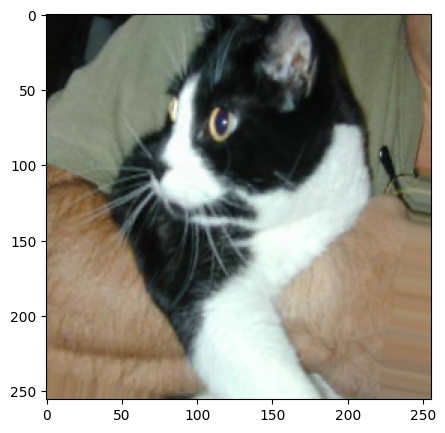

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

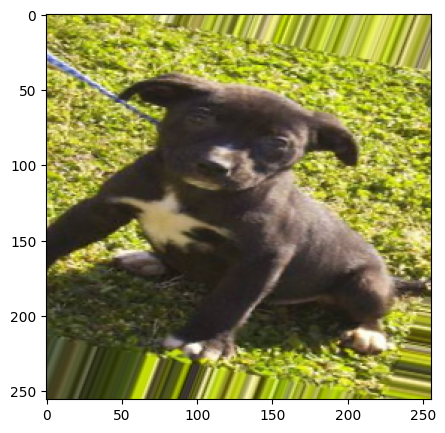

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

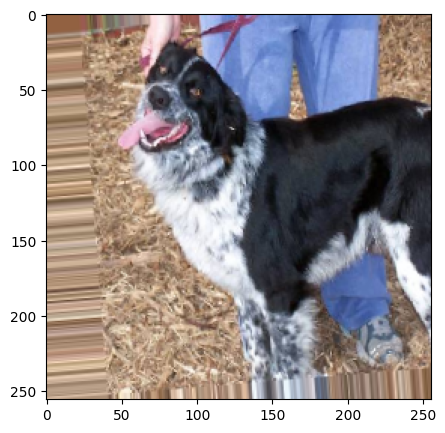

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

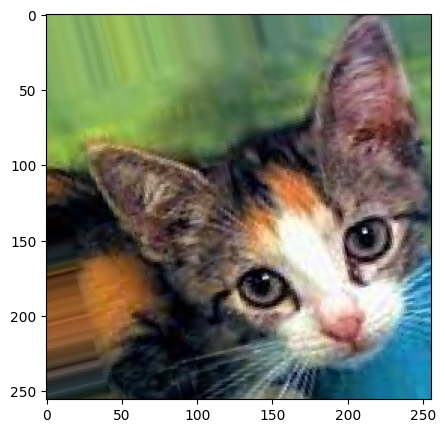

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

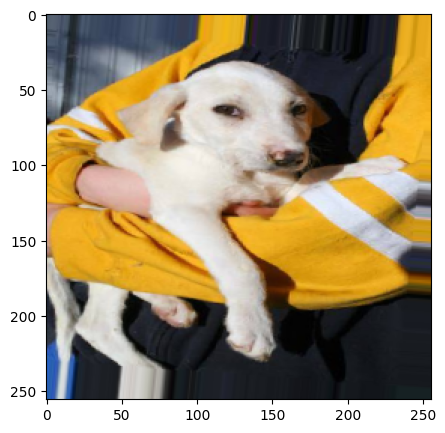

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

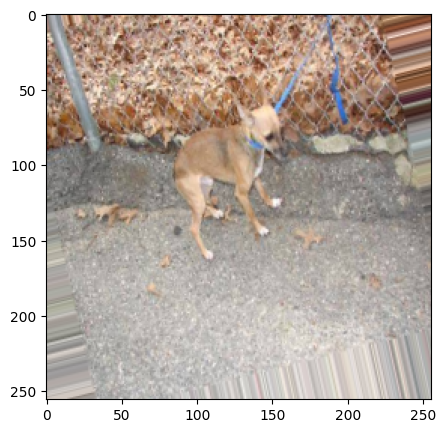

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

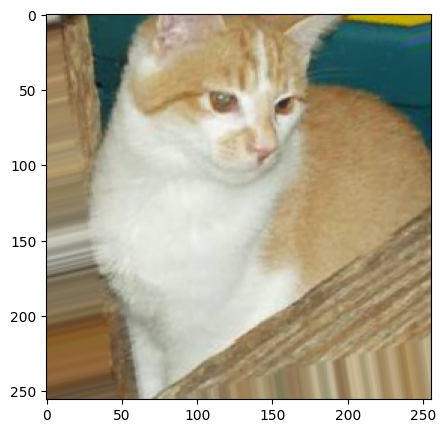

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

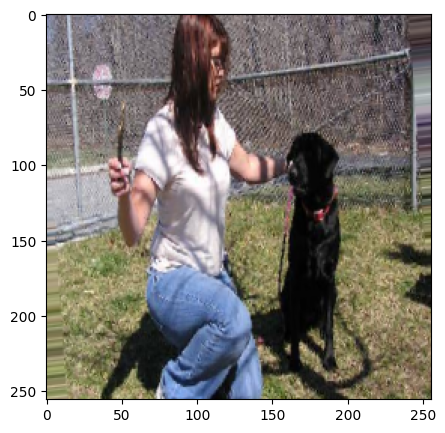

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

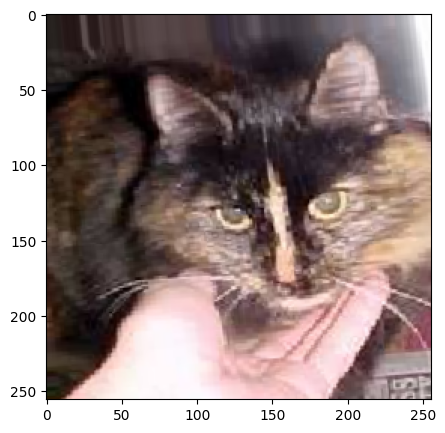

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

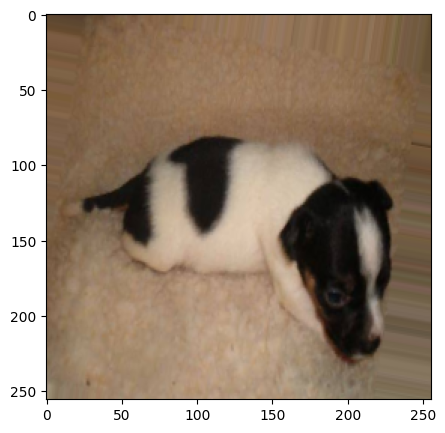

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

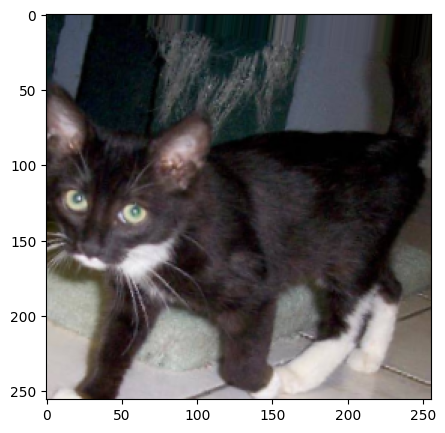

In [21]:
plot(train_img,label)

In [22]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [23]:
mc=ModelCheckpoint(filepath="C:\\Users\\manoj\\Desktop\\cats_vs_dog.h5",monitor='accuracy',save_best_only=True)
ec=EarlyStopping(monitor='accuracy',min_delta=0.01,patience=5,verbose=1)
cb=[mc,ec]

In [47]:
model.fit_generator(train_data,callbacks=cb,steps_per_epoch=10,epochs=30)

C:\Users\manoj\AppData\Local\Temp\ipykernel_3340\1870352908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,callbacks=cb,steps_per_epoch=10,epochs=30)
C:\Users\manoj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/30
10/10 [==============================] - 25s 2s/step - loss: 1.0370 - accuracy: 0.8078
Epoch 2/30
10/10 [==============================] - 24s 2s/step - loss: 1.0253 - accuracy: 0.7609
Epoch 3/30
10/10 [==============================] - 25s 2s/step - loss: 0.8745 - accuracy: 0.8125
Epoch 4/30
10/10 [==============================] - 23s 2s/step - loss: 0.8983 - accuracy: 0.7703
Epoch 5/30
10/10 [==============================] - 23s 2s/step - loss: 1.0455 - accuracy: 0.7672
Epoch 6/30
10/10 [==============================] - 24s 2s/step - loss: 0.7969 - accuracy: 0.7906
Epoch 6: early stopping


In [28]:
pred_model=load_model(r"C:\Users\manoj\Desktop\cats_vs_dog.h5")

In [48]:
pred_model.get_metrics_result

<bound method Model.get_metrics_result of <keras.engine.functional.Functional object at 0x0000020CA575F250>>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 138ms/step
this is a dog


<IPython.core.display.Javascript object>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


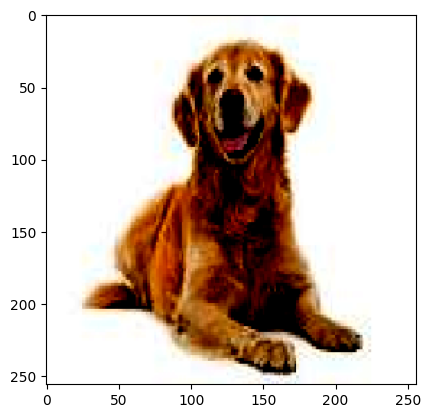

In [49]:
img_path=r"C:\Users\manoj\Desktop\Untitled.jpeg"
image=load_img(img_path,target_size=(256,256))

img=img_to_array(image)
img=preprocess_input(img)

input_arr=np.array([img])

pred=np.argmax(pred_model.predict(input_arr))

if pred== 0:
    print("this is a cat")
else:
    print('this is a dog')
    
plt.imshow(input_arr[0])

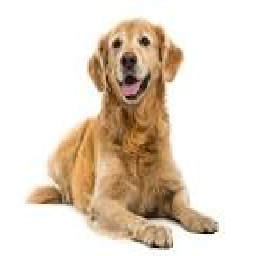

In [50]:
image